# Name: Christian Jay Baguio
# Section: DS2A

# Linear Non Linear Model

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sample_df = pd.read_csv("HR Employee Attrition.csv")
sample_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


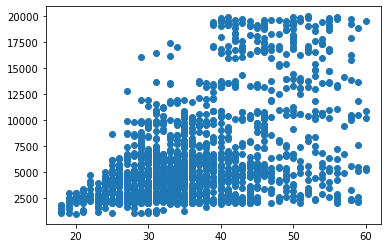

In [4]:
plt.scatter(sample_df['Age'], sample_df['MonthlyIncome'])

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(sample_df[["Age", "MonthlyIncome"]])# compute clusters from the means of age and fare
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
sample_df["cluster"]= y_predicted# append the predicted to the dataframe
sample_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


No handles with labels found to put in legend.


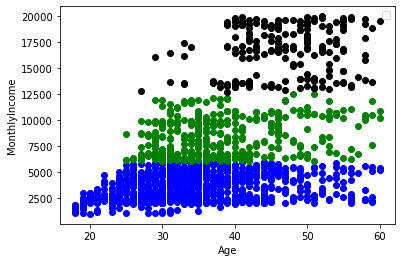

In [8]:
#separate dataframes from one cluster
df1 = sample_df[sample_df.cluster == 0]
df2 = sample_df[sample_df.cluster == 1]#three different dataframes
df3 = sample_df[sample_df.cluster == 2]

plt.scatter(df1.Age, df1['MonthlyIncome'], color = "blue")
plt.scatter(df2.Age, df2['MonthlyIncome'], color = "green")#plot them with different colors
plt.scatter(df3.Age, df3['MonthlyIncome'], color = "black")

plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.legend()

In [9]:
#create scaler
scaler = MinMaxScaler() #Transform features by scaling each feature to a given range
scaler.fit(sample_df[["MonthlyIncome"]])
sample_df[["MonthlyIncome"]] = scaler.transform(sample_df[["MonthlyIncome"]])
sample_df

scaler.fit(sample_df[["Age"]])
sample_df[["Age"]] = scaler.transform(sample_df[["Age"]])


#this area is kinda buggy to me because it keeps saying reshape the data sets even tho the fit is separate

In [10]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(sample_df[["Age", "MonthlyIncome"]])
y_predicted

array([2, 2, 0, ..., 0, 2, 0])

In [17]:
sample_df["cluster"] = y_predicted
sample_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster
0,0.547619,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,2
1,0.738095,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2
2,0.452381,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,0.357143,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,0.214286,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [18]:
km.cluster_centers_

array([[0.82798288, 0.18282183],
       [0.42771497, 0.50058153],
       [0.34900021, 0.27767178],
       [0.8216011 , 0.8906152 ],
       [0.77287319, 0.54238422],
       [0.17392046, 0.10716393],
       [0.57312169, 0.18693488],
       [0.3770268 , 0.11241646],
       [0.57755102, 0.88912209]])

No handles with labels found to put in legend.


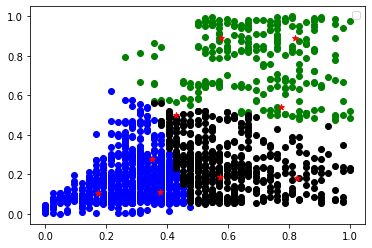

In [19]:
#separate dataframes from one cluster
df1 = sample_df[sample_df.cluster == 0]
df2 = sample_df[sample_df.cluster == 1]#three different dataframes
df3 = sample_df[sample_df.cluster == 2]

plt.scatter(df1.Age, df1['MonthlyIncome'], color = "blue")
plt.scatter(df2.Age, df2['MonthlyIncome'], color = "green")#plot them with different colors
plt.scatter(df3.Age, df3['MonthlyIncome'], color = "black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "red", marker = "*")
plt.legend()

In [20]:
#elbow plot method
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(sample_df[['Age', 'MonthlyIncome']])
    sse.append(km.inertia_)# get sum of square error

In [21]:
sse

[159.78797102744298,
 75.66033947870508,
 47.98953529252113,
 35.595173714572056,
 27.38781591457822,
 22.712083160567495,
 19.502227235802426,
 17.006042222650805,
 15.117624397858748]

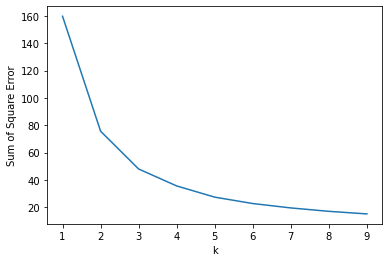

In [22]:
plt.xlabel("k")
plt.ylabel("Sum of Square Error")
plt.plot(k_range, sse)